#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

In [1]:
import pandas as pd
df = pd.read_csv("data/sample_data_with_outliers.csv")
df

,Age,Income,Purchase
0,76,75071,1
1,88,62405,0
2,82,61914,1
3,81,66843,1
4,62,30492,0
...,...,...,...
195,61,60764,1
196,64,49855,1
197,46,24735,0
198,29,60864,1


<Axes: ylabel='Frequency'>

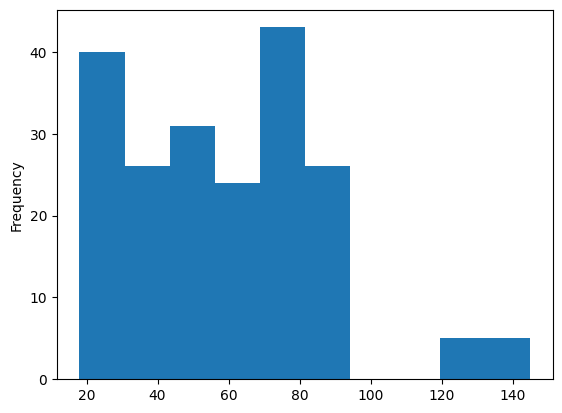

In [2]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

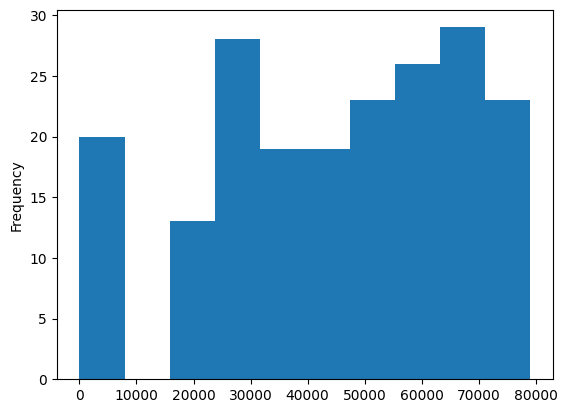

In [3]:
df['Income'].plot.hist()

In [7]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.15)  # contamination is the proportion of outliers in the data
isolation_forest.fit(df)

# Predict outliers
outliers = isolation_forest.predict(df) == -1

# Remove outliers
cleanDF = df[~outliers]

cleanDF

,Age,Income,Purchase
0,76,75071,1
1,88,62405,0
2,82,61914,1
3,81,66843,1
4,62,30492,0
...,...,...,...
195,61,60764,1
196,64,49855,1
197,46,24735,0
198,29,60864,1


<Axes: ylabel='Frequency'>

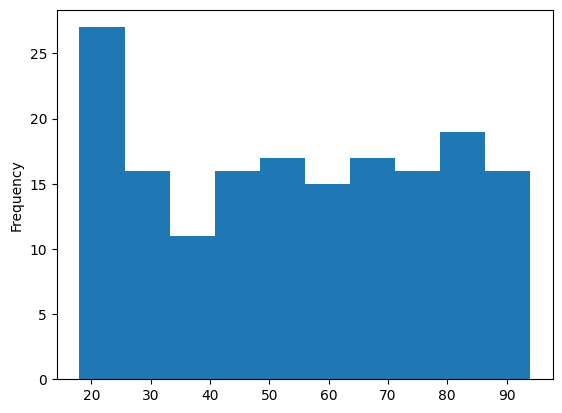

In [8]:
cleanDF['Age'].plot.hist()

<Axes: ylabel='Frequency'>

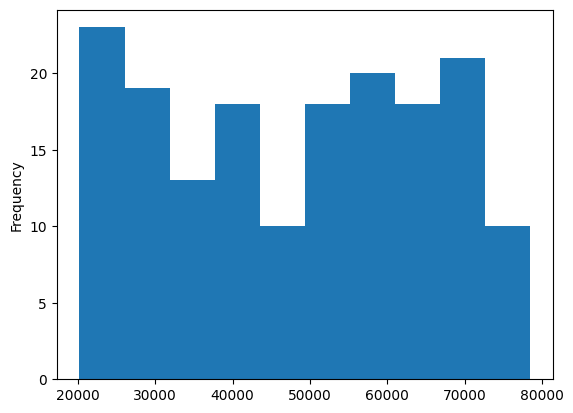

In [9]:
cleanDF['Income'].plot.hist()

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


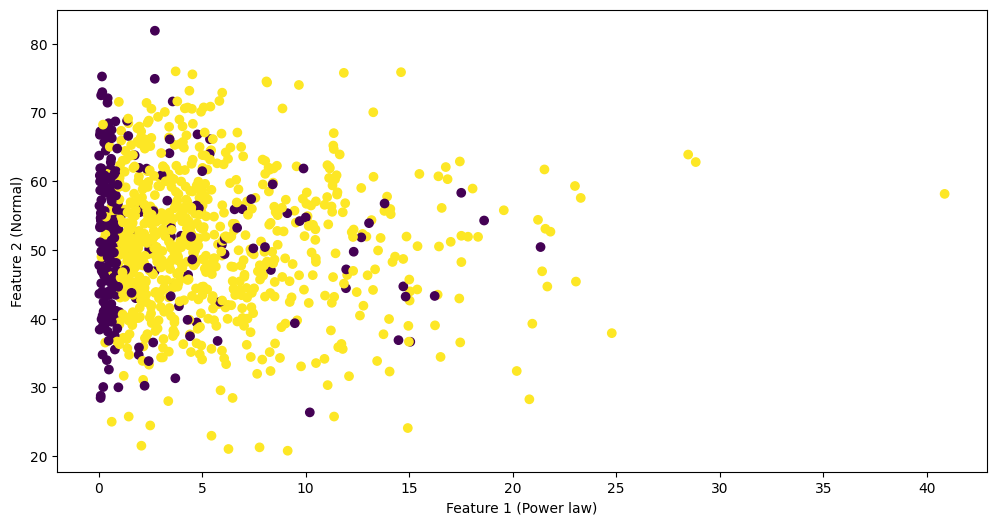

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)



# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import accuracy_score

# Load the dataset
titanic = pd.read_csv('../2-week2/data/titanic.csv')

# Select relevant columns
titanic = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'survived']]

# Encode categorical variables
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])

# Split the dataset into features and target
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def handle_missing_values(method):
    if method == 'ffill':
        X_train_imputed = X_train.fillna(method='ffill')
        X_test_imputed = X_test.fillna(method='ffill')
    elif method == 'mean':
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)
    elif method == 'most_frequent':
        imputer = SimpleImputer(strategy='most_frequent')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)
    elif method == 'knn':
        imputer = KNNImputer(n_neighbors=5)
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)
    else:
        raise ValueError(f"Invalid method: {method}")
    
    # Train a DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_imputed, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_imputed)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# List of methods to try
methods = ['ffill', 'mean', 'most_frequent', 'knn']

# Train and evaluate the classifier for each method
for method in methods:
    accuracy = handle_missing_values(method)
    print(f"Method: {method}, Accuracy: {accuracy:.4f}")

Method: ffill, Accuracy: 0.7252
Method: mean, Accuracy: 0.7443
Method: most_frequent, Accuracy: 0.7443
Method: knn, Accuracy: 0.7595


/tmp/ipykernel_12134/3549419014.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train_imputed = X_train.fillna(method='ffill')
/tmp/ipykernel_12134/3549419014.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test_imputed = X_test.fillna(method='ffill')


#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10, 2, 3, 1, 6, 9]
})

# Columns to one-hot encode
columns_to_encode = ['color', 'target']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the encoder
encoded_data = encoder.fit_transform(sample[columns_to_encode])

# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the original dataframe with the encoded dataframe
final_df = pd.concat([sample.drop(columns_to_encode, axis=1), encoded_df], axis=1)

final_df

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,yumminess,color_blue,color_green,color_red,target_apple,target_grass,target_moon,target_sky
0,10,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,9,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.